In [13]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=MSFT&interval=5min&apikey=XX5ESBW86BXRZI0E'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'MSFT', '3. Last Refreshed': '2023-11-22 18:55:00', '4. Interval': '5min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2023-11-22 18:55:00': {'1. open': '377.8600', '2. high': '377.9900', '3. low': '377.8200', '4. close': '377.8200', '5. volume': '417'}, '2023-11-22 18:50:00': {'1. open': '377.8000', '2. high': '377.9000', '3. low': '377.8000', '4. close': '377.9000', '5. volume': '1878'}, '2023-11-22 18:45:00': {'1. open': '377.8000', '2. high': '377.8500', '3. low': '377.8000', '4. close': '377.8200', '5. volume': '2426'}, '2023-11-22 18:40:00': {'1. open': '377.8000', '2. high': '377.8500', '3. low': '377.8000', '4. close': '377.8500', '5. volume': '74'}, '2023-11-22 18:35:00': {'1. open': '377.8100', '2. high': '377.8200', '3. low': '377.8000', '4. close': '377.8200', '5. volume': '857'}, '2023-11-22 18:30:00': {'1. open': '377.8300', '2.

In [3]:
import pandas as pd

In [14]:
df = pd.DataFrame(data['Time Series (5min)']).transpose()

In [20]:

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&month=2023-11&outputsize=full&symbol=MSFT&interval=5min&apikey=XX5ESBW86BXRZI0E'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'MSFT', '3. Last Refreshed': '2023-11-22 18:55:00', '4. Interval': '5min', '5. Output Size': 'Full size', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2023-11-22 18:55:00': {'1. open': '377.8600', '2. high': '377.9900', '3. low': '377.8200', '4. close': '377.8200', '5. volume': '417'}, '2023-11-22 18:50:00': {'1. open': '377.8000', '2. high': '377.9000', '3. low': '377.8000', '4. close': '377.9000', '5. volume': '1878'}, '2023-11-22 18:45:00': {'1. open': '377.8000', '2. high': '377.8500', '3. low': '377.8000', '4. close': '377.8200', '5. volume': '2426'}, '2023-11-22 18:40:00': {'1. open': '377.8000', '2. high': '377.8500', '3. low': '377.8000', '4. close': '377.8500', '5. volume': '74'}, '2023-11-22 18:35:00': {'1. open': '377.8100', '2. high': '377.8200', '3. low': '377.8000', '4. close': '377.8200', '5. volume': '857'}, '2023-11-22 18:30:00': {'1. open': '377.8300', '

In [21]:
df11 = pd.DataFrame(data['Time Series (5min)']).transpose()

In [22]:
df11

,1. open,2. high,3. low,4. close,5. volume
2023-11-22 18:55:00,377.8600,377.9900,377.8200,377.8200,417
2023-11-22 18:50:00,377.8000,377.9000,377.8000,377.9000,1878
2023-11-22 18:45:00,377.8000,377.8500,377.8000,377.8200,2426
2023-11-22 18:40:00,377.8000,377.8500,377.8000,377.8500,74
2023-11-22 18:35:00,377.8100,377.8200,377.8000,377.8200,857
...,...,...,...,...,...
2023-11-01 04:20:00,337.1900,337.1900,336.8790,336.8900,127
2023-11-01 04:15:00,337.3000,337.3000,337.1580,337.1600,47
2023-11-01 04:10:00,337.0210,337.3200,336.9290,337.3190,79
2023-11-01 04:05:00,337.5300,337.5300,336.8990,337.3090,771


In [23]:
!pip install seaborn

Looking in indexes: https://bytedpypi.byted.org/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 3.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 10.9 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.6 MB/s eta 0:00:000m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 10.6 MB/s eta 0:00:0031m10.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 5.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [58]:
df.sort_index(inplace=True, ascending=True)

In [59]:
df11[:200]

,1. open,2. high,3. low,4. close,5. volume
2023-11-22 18:55:00,377.8600,377.9900,377.8200,377.8200,417
2023-11-22 18:50:00,377.8000,377.9000,377.8000,377.9000,1878
2023-11-22 18:45:00,377.8000,377.8500,377.8000,377.8200,2426
2023-11-22 18:40:00,377.8000,377.8500,377.8000,377.8500,74
2023-11-22 18:35:00,377.8100,377.8200,377.8000,377.8200,857
...,...,...,...,...,...
2023-11-21 18:40:00,371.5700,371.7500,371.2000,371.5000,2097
2023-11-21 18:35:00,371.5000,371.7500,371.1500,371.6200,3485
2023-11-21 18:30:00,371.7400,371.7400,371.1000,371.4000,1454
2023-11-21 18:25:00,371.0000,371.4500,370.9200,371.4300,9351


In [98]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=XX5ESBW86BXRZI0E'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'MSFT', '3. Last Refreshed': '2023-11-22', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2023-11-22': {'1. open': '378.0000', '2. high': '379.7899', '3. low': '374.9650', '4. close': '377.8500', '5. volume': '23361184'}, '2023-11-21': {'1. open': '375.6700', '2. high': '376.2215', '3. low': '371.1200', '4. close': '373.0700', '5. volume': '28423145'}, '2023-11-20': {'1. open': '371.2200', '2. high': '378.8700', '3. low': '371.0000', '4. close': '377.4400', '5. volume': '52528964'}, '2023-11-17': {'1. open': '373.6100', '2. high': '374.3700', '3. low': '367.0000', '4. close': '369.8500', '5. volume': '40325371'}, '2023-11-16': {'1. open': '370.9600', '2. high': '376.3500', '3. low': '370.1800', '4. close': '376.1700', '5. volume': '27182315'}, '2023-11-15': {'1. open': '371.2800', '2. high': '373.1300', '3. low': '367.1100', '4. close': '369.6700', '5

In [99]:
df = pd.DataFrame(data['Time Series (Daily)']).transpose()

In [100]:
df

,1. open,2. high,3. low,4. close,5. volume
2023-11-22,378.0000,379.7899,374.9650,377.8500,23361184
2023-11-21,375.6700,376.2215,371.1200,373.0700,28423145
2023-11-20,371.2200,378.8700,371.0000,377.4400,52528964
2023-11-17,373.6100,374.3700,367.0000,369.8500,40325371
2023-11-16,370.9600,376.3500,370.1800,376.1700,27182315
...,...,...,...,...,...
2023-07-11,331.0600,332.8600,327.0000,332.4700,26698218
2023-07-10,334.6000,335.2300,327.5900,331.8300,32791449
2023-07-07,339.3200,341.7900,337.0000,337.2200,21214824
2023-07-06,337.3000,342.9900,335.5000,341.2700,28195534


<Axes: xlabel='None', ylabel='4. close'>

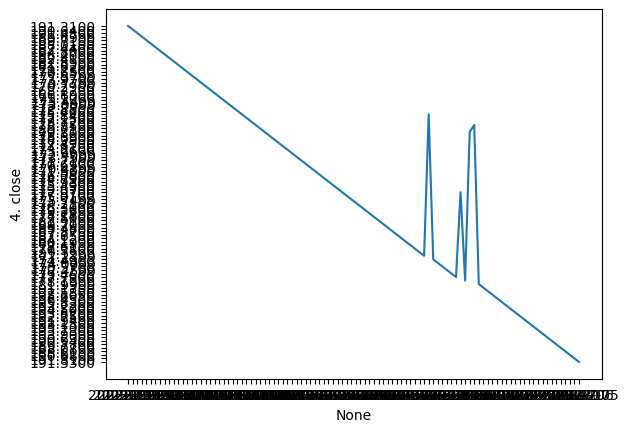

In [90]:
sns.lineplot(data=df,x=df.index,
             y='4. close')

In [78]:
list(df['4. close'])

['155.1300',
 '153.9100',
 '154.3500',
 '152.8900',
 '153.0600',
 '152.5800',
 '150.4100',
 '148.1000',
 '149.0200',
 '146.6200',
 '148.0300',
 '148.8300',
 '148.9700',
 '147.9000',
 '147.0100',
 '145.4000',
 '144.6400',
 '142.6300',
 '142.5200',
 '143.7600',
 '137.0800',
 '137.7900',
 '136.3800',
 '137.1600',
 '138.0100',
 '139.9700',
 '140.3200',
 '139.2100',
 '138.4600',
 '141.2400',
 '143.2300',
 '142.1100',
 '142.2000',
 '142.0300',
 '141.5200',
 '141.0700',
 '140.3900',
 '140.8000',
 '140.3000',
 '141.5800',
 '143.1700',
 '143.2400',
 '146.4800',
 '146.9100',
 '147.3800',
 '149.8300',
 '146.5200',
 '145.0900',
 '145.9900',
 '147.3500',
 '146.5500',
 '146.3000',
 '148.3800',
 '147.6800',
 '147.5200',
 '148.0600',
 '148.1300',
 '147.9400',
 '146.8300',
 '146.8600',
 '146.4500',
 '146.0200',
 '145.3500',
 '143.5500',
 '143.4100',
 '141.4900',
 '142.2800',
 '141.4100',
 '140.6600',
 '140.6400',
 '141.8700',
 '141.9100',
 '143.1200',
 '143.2500',
 '142.4900',
 '145.9100',
 '146.1800',

<Axes: xlabel='None', ylabel='4. close'>

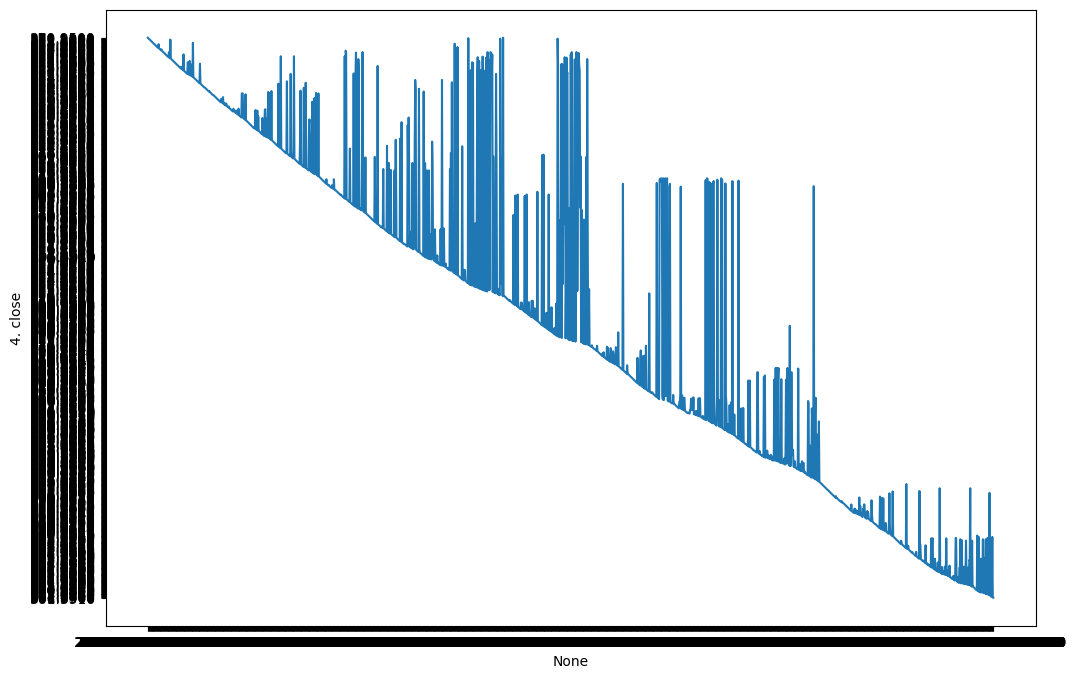

In [66]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.lineplot(data=df11[200:2000],x=df11.index[200:2000],
             y='4. close')

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df11[:100]

,1. open,2. high,3. low,4. close,5. volume
2023-11-22 18:55:00,377.8600,377.9900,377.8200,377.8200,417
2023-11-22 18:50:00,377.8000,377.9000,377.8000,377.9000,1878
2023-11-22 18:45:00,377.8000,377.8500,377.8000,377.8200,2426
2023-11-22 18:40:00,377.8000,377.8500,377.8000,377.8500,74
2023-11-22 18:35:00,377.8100,377.8200,377.8000,377.8200,857
...,...,...,...,...,...
2023-11-22 11:00:00,377.1900,378.0900,377.0300,378.0100,241295
2023-11-22 10:55:00,377.2400,377.6500,377.1800,377.1900,164615
2023-11-22 10:50:00,378.1400,378.2400,377.0100,377.2340,246311
2023-11-22 10:45:00,378.0400,378.2310,377.7700,378.1110,211652


In [36]:
df11.index 

Index(['2023-11-22 18:55:00', '2023-11-22 18:50:00', '2023-11-22 18:45:00',
       '2023-11-22 18:40:00', '2023-11-22 18:35:00', '2023-11-22 18:30:00',
       '2023-11-22 18:25:00', '2023-11-22 18:20:00', '2023-11-22 18:15:00',
       '2023-11-22 18:10:00',
       ...
       '2023-11-01 04:45:00', '2023-11-01 04:40:00', '2023-11-01 04:35:00',
       '2023-11-01 04:30:00', '2023-11-01 04:25:00', '2023-11-01 04:20:00',
       '2023-11-01 04:15:00', '2023-11-01 04:10:00', '2023-11-01 04:05:00',
       '2023-11-01 04:00:00'],
      dtype='object', length=3060)

In [101]:
import akshare as ak

stock_us_daily_df = ak.stock_us_daily(symbol="MSFT", adjust="qfq")
print(stock_us_daily_df)

           date      open      high       low     close        volume
0    1986-03-13  -27.2515  -27.2384  -27.2515  -27.2428  1.031789e+09
1    1986-03-14  -27.2428  -27.2376  -27.2428  -27.2393  3.081600e+08
2    1986-03-17  -27.2393  -27.2367  -27.2393  -27.2376  1.331712e+08
3    1986-03-18  -27.2376  -27.2367  -27.2410  -27.2402  6.776640e+07
4    1986-03-19  -27.2402  -27.2393  -27.2428  -27.2419  4.789440e+07
...         ...       ...       ...       ...       ...           ...
8942 2023-11-16  370.9600  376.3500  370.1800  376.1700  2.718209e+07
8943 2023-11-17  373.6100  374.3700  367.0000  369.8500  4.032530e+07
8944 2023-11-20  371.2200  378.8700  371.0000  377.4400  5.252886e+07
8945 2023-11-21  375.6700  376.2215  371.1200  373.0700  2.842314e+07
8946 2023-11-22  378.0000  379.7899  374.9650  377.8500  2.336118e+07

[8947 rows x 6 columns]


/Users/bytedance/.pyenv/versions/3.11.3/envs/q_data/lib/python3.11/site-packages/akshare/stock/stock_us_sina.py:160: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_range = new_range.fillna(method="ffill")


In [103]:
stock_us_daily_df[-100:]

,date,open,high,low,close,volume
8847,2023-07-05,333.66,340.2200,333.300,336.72,18172378.0
8848,2023-07-06,335.87,341.5600,334.070,339.84,28195534.0
8849,2023-07-07,337.89,340.3600,335.570,335.79,21214824.0
8850,2023-07-10,333.17,333.8000,326.160,330.40,32791449.0
8851,2023-07-11,329.63,331.4300,325.570,331.04,26698218.0
...,...,...,...,...,...,...
8942,2023-11-16,370.96,376.3500,370.180,376.17,27182093.0
8943,2023-11-17,373.61,374.3700,367.000,369.85,40325304.0
8944,2023-11-20,371.22,378.8700,371.000,377.44,52528855.0
8945,2023-11-21,375.67,376.2215,371.120,373.07,28423145.0


In [82]:
!pip install akshare

Looking in indexes: https://bytedpypi.byted.org/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.8 MB/s eta 0:00:007.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 15.8 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.9 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 20.1 MB/s eta 0:00:00
  Using cached jsonpath-0.82.2-py3-none-any.whl
  Using cached py_mini_racer-0.6.0-py3-none-any.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 12.2 MB/s eta 0:00:00m eta 0:00:0136m0:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pi

In [104]:
import akshare as ak

stock_us_famous_spot_em_df = ak.stock_us_famous_spot_em(symbol='科技类')
print(stock_us_famous_spot_em_df)

    序号                         名称     最新价    涨跌额   涨跌幅     开盘价     最高价  \
0    1  Opendoor Technologies Inc    2.45   0.11  4.70    2.38    2.51   
1    2                         易趣   41.64   1.25  3.09   40.53   41.86   
2    3                         惠普   28.66   0.79  2.83   28.46   29.29   
3    4                      超威半导体  122.51   3.35  2.81  120.00  124.76   
4    5                        亚马逊  146.71   2.81  1.95  144.57  147.74   
5    6                        奥多比  619.72   8.73  1.43  616.63  624.38   
6    7              Groupon Inc-A   10.08   0.13  1.31    9.99   10.51   
7    8                         微软  377.85   4.78  1.28  378.00  379.79   
8    9                       谷歌-C  140.02   1.40  1.01  139.10  141.10   
9   10          SentinelOne Inc-A   17.49   0.16  0.92   17.51   17.75   
10  11                        高知特   70.88   0.63  0.90   70.49   71.26   
11  12              IBM国际商业机器(US)  155.13   1.22  0.79  154.50  155.71   
12  13                         思科   48

In [105]:
import akshare as ak

us_stock_current_df = ak.stock_us_spot()
print(us_stock_current_df)

                                         name  \
0                                 Apple, Inc.   
1                             Microsoft Corp.   
2                              Alphabet, Inc.   
3                              Alphabet, Inc.   
4                            Amazon.com, Inc.   
...                                       ...   
14216  X-Square Municipal Income Tax Free ETF   
14217                                    ZTST   
14218                           Zura Bio Ltd.   
14219              ZyVersa Therapeutics, Inc.   
14220                         IEX Test symbol   

                                        cname category symbol   price   diff  \
0                                        苹果公司      计算机   AAPL  191.31   0.67   
1                                        微软公司       软件   MSFT  377.85   4.78   
2                                          谷歌      互联网   GOOG  140.02   1.40   
3                                       谷歌A类股     媒体内容  GOOGL  138.49   1.52   
4          

In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('../2023-11-21-America-sotck-list.csv', header=0, index_col=0)

In [8]:
df.sche

<bound method NDFrame.to_sql of       symbol                             name   exchange assetType  \
0          A         Agilent Technologies Inc       NYSE     Stock   
1         AA                       Alcoa Corp       NYSE     Stock   
2        AAA  AXS First Priority CLO Bond ETF  NYSE ARCA       ETF   
3       AAAU  Goldman Sachs Physical Gold ETF       BATS       ETF   
4       AACG            ATA Creativity Global     NASDAQ     Stock   
...      ...                              ...        ...       ...   
11594   ZYNE      Zynerba Pharmaceuticals Inc     NASDAQ     Stock   
11595   ZYRX      Global Earnings Capital Ltd     NASDAQ     Stock   
11596   ZYXI                        Zynex Inc     NASDAQ     Stock   
11597    ZZK                              NaN  NYSE ARCA     Stock   
11598    ZZZ              TEST TICKER FOR UTP  NYSE ARCA     Stock   

          ipoDate  delistingDate  status  
0      1999-11-18            NaN  Active  
1      2016-10-18            NaN  Active 

CREATE TABLE "stock_meta_data" (
"symbol" TEXT,
  "name" TEXT,
  "exchange" TEXT,
  "assetType" TEXT,
  "ipoDate" TEXT,
  "delistingDate" REAL,
  "status" TEXT
)


In [12]:
df.ipoDate

0        1999-11-18
1        2016-10-18
2        2020-09-09
3        2018-08-15
4        2008-01-29
            ...    
11594    2015-08-05
11595    2007-07-13
11596    2012-07-23
11597    2020-07-22
11598    2014-10-31
Name: ipoDate, Length: 11599, dtype: object

In [13]:
df.columns

Index(['symbol', 'name', 'exchange', 'assetType', 'ipoDate', 'delistingDate',
       'status'],
      dtype='object')

In [14]:
df.delistingDatedf

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
11594   NaN
11595   NaN
11596   NaN
11597   NaN
11598   NaN
Name: delistingDate, Length: 11599, dtype: float64

In [18]:
df.ipoDate = pd.to_datetime(df.ipoDate)
df.delistingDate = pd.to_datetime(df.delistingDate)

In [19]:
print(pd.io.sql.get_schema(df, name='stock_meta_data'))

CREATE TABLE "stock_meta_data" (
"symbol" TEXT,
  "name" TEXT,
  "exchange" TEXT,
  "assetType" TEXT,
  "ipoDate" TIMESTAMP,
  "delistingDate" TIMESTAMP,
  "status" TEXT
)


In [21]:
df['country'] = 'US'

In [22]:
df

,symbol,name,exchange,assetType,ipoDate,delistingDate,status,country
0,A,Agilent Technologies Inc,NYSE,Stock,1999-11-18,NaT,Active,US
1,AA,Alcoa Corp,NYSE,Stock,2016-10-18,NaT,Active,US
2,AAA,AXS First Priority CLO Bond ETF,NYSE ARCA,ETF,2020-09-09,NaT,Active,US
3,AAAU,Goldman Sachs Physical Gold ETF,BATS,ETF,2018-08-15,NaT,Active,US
4,AACG,ATA Creativity Global,NASDAQ,Stock,2008-01-29,NaT,Active,US
...,...,...,...,...,...,...,...,...
11594,ZYNE,Zynerba Pharmaceuticals Inc,NASDAQ,Stock,2015-08-05,NaT,Active,US
11595,ZYRX,Global Earnings Capital Ltd,NASDAQ,Stock,2007-07-13,NaT,Active,US
11596,ZYXI,Zynex Inc,NASDAQ,Stock,2012-07-23,NaT,Active,US
11597,ZZK,NaN,NYSE ARCA,Stock,2020-07-22,NaT,Active,US


In [30]:
from typing import Optional, Dict
def create_upsert_method(meta: db.MetaData, extra_update_fields: Optional[Dict[str, str]]):
    """
    Create upsert method that satisfied the pandas's to_sql API.
    """
    def method(table, conn, keys, data_iter):
        # select table that data is being inserted to (from pandas's context)
        sql_table = db.Table(table.name, meta, autoload=True)
        
        # list of dictionaries {col_name: value} of data to insert
        values_to_insert = [dict(zip(keys, data)) for data in data_iter]
        
        # create insert statement using postgresql dialect.
        # For other dialects, please refer to https://docs.sqlalchemy.org/en/14/dialects/
        insert_stmt = db.dialects.postgresql.insert(sql_table, values_to_insert)

        # create update statement for excluded fields on conflict
        update_stmt = {exc_k.key: exc_k for exc_k in insert_stmt.excluded}
        if extra_update_fields:
            update_stmt.update(extra_update_fields)
        
        # create upsert statement. 
        upsert_stmt = insert_stmt.on_conflict_do_update(
            index_elements=sql_table.primary_key.columns, # index elements are primary keys of a table
            set_=update_stmt # the SET part of an INSERT statement
        )
        
        # execute upsert statement
        conn.execute(upsert_stmt)

    return method

# create postgres db engine
db_engine = db.create_engine(f"postgresql://{user}:{password}@{host}:5432/{database}")

df = pd.DataFrame({
  'id': [10, 20],
  'updated_at': [pd.to_datetime(1490195805, unit='s'), pd.to_datetime(1490205805, unit='s')]
})

# create DB metadata object that can access table names, primary keys, etc.
meta = db.MetaData(db_engine)

# dictionary which will add additional changes on update statement. I.e. all the columns which are not present in DataFrame,
# but needed to be updated regardless. The common example is `updated_at`. This column can be updated right on SQL server, instead of in pandas DataFrame
extra_update_fields = {"updated_at": "NOW()"}

# create upsert method that is accepted by pandas API
upsert_method = create_upsert_method(meta, extra_update_fields)
table_name = "american_stock_meta"
# perform upsert of df DataFrame values to a table `table_name` and Postgres connection defined at `db_engine`
df.to_sql(
  table_name,
  db_engine,
  schema=db_schema,
  index=False,
  if_exists="append",
  chunksize=200, # it's recommended to insert data in chunks
  method=upsert_method
)

ArgumentError: expected schema argument to be a string, got <class 'sqlalchemy.engine.base.Engine'>.

In [23]:
import sqlalchemy as db

In [35]:
create_db = pd.io.sql.get_schema(df, name='stock_meta_data')
print()

In [25]:
user = "root"
password = "root"
host = "localhost"
database = "q_data"

In [31]:
insp = db.inspect(db_engine)

In [33]:
table_name="american_stock_list"

In [34]:
insp.has_table(table_name)

False

In [38]:
db_engine.execute(db.text(create_db))

AttributeError: 'Engine' object has no attribute 'execute'

In [39]:
with db_engine.connect() as c:
    result = c.execute(db.text(create_db))
    for row in result:
        print(rwo)

TypeError: 'Engine' object does not support the context manager protocol

In [40]:
db.__version__

'2.0.23'